In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/asia-cup-cricket-1984-to-2022/batsman data.csv
/kaggle/input/asia-cup-cricket-1984-to-2022/champion.csv
/kaggle/input/asia-cup-cricket-1984-to-2022/wicketkeeper data.csv
/kaggle/input/asia-cup-cricket-1984-to-2022/bowler data.csv
/kaggle/input/asia-cup-cricket-1984-to-2022/asiacup.csv


In [2]:
data = pd.read_csv('/kaggle/input/asia-cup-cricket-1984-to-2022/asiacup.csv')

data

,Team,Opponent,Format,Ground,Year,Toss,Selection,Run Scored,Wicket Lost,Fours,Sixes,Extras,Run Rate,Avg Bat Strike Rate,Highest Score,Wicket Taken,Given Extras,Highest Individual wicket,Player Of The Match,Result
0,Pakistan,Sri Lanka,ODI,Sharjah,1984,Lose,Batting,187.0,9.0,9.0,3.0,21.0,4.06,52.04,47.0,5.0,26.0,2.0,Roy Dias,Lose
1,Sri Lanka,Pakistan,ODI,Sharjah,1984,Win,Bowling,190.0,5.0,11.0,1.0,26.0,4.36,68.51,57.0,9.0,21.0,3.0,Roy Dias,Win
2,India,Sri Lanka,ODI,Sharjah,1984,Win,Bowling,97.0,0.0,9.0,0.0,14.0,4.47,60.48,51.0,10.0,8.0,3.0,Surinder Khanna,Win
3,Sri Lanka,India,ODI,Sharjah,1984,Lose,Batting,96.0,10.0,7.0,0.0,8.0,2.34,25.74,38.0,0.0,14.0,0.0,Surinder Khanna,Lose
4,India,Pakistan,ODI,Sharjah,1984,Win,Batting,188.0,4.0,13.0,3.0,17.0,4.08,60.21,56.0,10.0,5.0,3.0,Surinder Khanna,Win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Sri Lanka,Afghanistan,T20I,Dubai(DSC),2022,Lose,Batting,105.0,10.0,11.0,2.0,6.0,5.33,47.46,38.0,2.0,12.0,1.0,Fazalhaq Farooqi,Lose
230,India,Pakistan,T20I,Dubai(DSC),2022,Win,Bowling,148.0,5.0,10.0,5.0,14.0,7.52,97.77,35.0,10.0,5.0,4.0,Hardik Pandya,Win
231,Pakistan,India,T20I,Dubai(DSC),2022,Lose,Batting,147.0,10.0,13.0,4.0,5.0,7.41,114.67,43.0,5.0,14.0,3.0,Hardik Pandya,Lose
232,Afghanistan,Bangladesh,T20I,Sharjah,2022,Lose,Bowling,131.0,3.0,10.0,6.0,4.0,7.08,118.76,43.0,7.0,5.0,3.0,Mujeeb Ur Rahman,Win


In [3]:
data.head(10)

,Team,Opponent,Format,Ground,Year,Toss,Selection,Run Scored,Wicket Lost,Fours,Sixes,Extras,Run Rate,Avg Bat Strike Rate,Highest Score,Wicket Taken,Given Extras,Highest Individual wicket,Player Of The Match,Result
0,Pakistan,Sri Lanka,ODI,Sharjah,1984,Lose,Batting,187.0,9.0,9.0,3.0,21.0,4.06,52.04,47.0,5.0,26.0,2.0,Roy Dias,Lose
1,Sri Lanka,Pakistan,ODI,Sharjah,1984,Win,Bowling,190.0,5.0,11.0,1.0,26.0,4.36,68.51,57.0,9.0,21.0,3.0,Roy Dias,Win
2,India,Sri Lanka,ODI,Sharjah,1984,Win,Bowling,97.0,0.0,9.0,0.0,14.0,4.47,60.48,51.0,10.0,8.0,3.0,Surinder Khanna,Win
3,Sri Lanka,India,ODI,Sharjah,1984,Lose,Batting,96.0,10.0,7.0,0.0,8.0,2.34,25.74,38.0,0.0,14.0,0.0,Surinder Khanna,Lose
4,India,Pakistan,ODI,Sharjah,1984,Win,Batting,188.0,4.0,13.0,3.0,17.0,4.08,60.21,56.0,10.0,5.0,3.0,Surinder Khanna,Win
5,Pakistan,India,ODI,Sharjah,1984,Lose,Bowling,134.0,10.0,5.0,0.0,5.0,3.37,39.46,35.0,4.0,17.0,1.0,Surinder Khanna,Lose
6,Sri Lanka,Pakistan,ODI,Colombo(PSS),1986,Win,Bowling,116.0,10.0,10.0,0.0,14.0,3.42,37.87,34.0,10.0,15.0,3.0,Mohsin Khan,Lose
7,Pakistan,Sri Lanka,ODI,Colombo(PSS),1986,Lose,Batting,197.0,10.0,14.0,3.0,15.0,4.37,65.14,39.0,10.0,14.0,3.0,Mohsin Khan,Win
8,Bangladesh,Pakistan,ODI,Moratuwa,1986,Lose,Batting,94.0,10.0,0.0,0.0,9.0,2.64,24.63,37.0,3.0,5.0,2.0,Wasim Akram,Lose
9,Pakistan,Bangladesh,ODI,Moratuwa,1986,Win,Bowling,98.0,3.0,4.0,0.0,5.0,3.04,36.79,47.0,10.0,9.0,4.0,Wasim Akram,Win


In [4]:
data.tail()

,Team,Opponent,Format,Ground,Year,Toss,Selection,Run Scored,Wicket Lost,Fours,Sixes,Extras,Run Rate,Avg Bat Strike Rate,Highest Score,Wicket Taken,Given Extras,Highest Individual wicket,Player Of The Match,Result
229,Sri Lanka,Afghanistan,T20I,Dubai(DSC),2022,Lose,Batting,105.0,10.0,11.0,2.0,6.0,5.33,47.46,38.0,2.0,12.0,1.0,Fazalhaq Farooqi,Lose
230,India,Pakistan,T20I,Dubai(DSC),2022,Win,Bowling,148.0,5.0,10.0,5.0,14.0,7.52,97.77,35.0,10.0,5.0,4.0,Hardik Pandya,Win
231,Pakistan,India,T20I,Dubai(DSC),2022,Lose,Batting,147.0,10.0,13.0,4.0,5.0,7.41,114.67,43.0,5.0,14.0,3.0,Hardik Pandya,Lose
232,Afghanistan,Bangladesh,T20I,Sharjah,2022,Lose,Bowling,131.0,3.0,10.0,6.0,4.0,7.08,118.76,43.0,7.0,5.0,3.0,Mujeeb Ur Rahman,Win
233,Bangladesh,Afghanistan,T20I,Sharjah,2022,Win,Batting,127.0,7.0,10.0,1.0,5.0,6.35,87.75,48.0,3.0,4.0,1.0,Mujeeb Ur Rahman,Lose


In [5]:
data.isna().sum()

Team                         0
Opponent                     0
Format                       0
Ground                       0
Year                         0
Toss                         0
Selection                    0
Run Scored                   2
Wicket Lost                  2
Fours                        2
Sixes                        2
Extras                       2
Run Rate                     2
Avg Bat Strike Rate          2
Highest Score                2
Wicket Taken                 2
Given Extras                 2
Highest Individual wicket    2
Player Of The Match          2
Result                       0
dtype: int64

In [6]:
data.shape

(234, 20)

In [7]:
data.columns

Index(['Team', 'Opponent', 'Format', 'Ground', 'Year', 'Toss', 'Selection',
       'Run Scored', 'Wicket Lost', 'Fours', 'Sixes', 'Extras', 'Run Rate',
       'Avg Bat Strike Rate', 'Highest Score', 'Wicket Taken', 'Given Extras',
       'Highest Individual wicket', 'Player Of The Match', 'Result'],
      dtype='object')

In [8]:
data.dropna(inplace=True)

In [9]:
data.isna().sum()

Team                         0
Opponent                     0
Format                       0
Ground                       0
Year                         0
Toss                         0
Selection                    0
Run Scored                   0
Wicket Lost                  0
Fours                        0
Sixes                        0
Extras                       0
Run Rate                     0
Avg Bat Strike Rate          0
Highest Score                0
Wicket Taken                 0
Given Extras                 0
Highest Individual wicket    0
Player Of The Match          0
Result                       0
dtype: int64

In [10]:
data.tail()

,Team,Opponent,Format,Ground,Year,Toss,Selection,Run Scored,Wicket Lost,Fours,Sixes,Extras,Run Rate,Avg Bat Strike Rate,Highest Score,Wicket Taken,Given Extras,Highest Individual wicket,Player Of The Match,Result
229,Sri Lanka,Afghanistan,T20I,Dubai(DSC),2022,Lose,Batting,105.0,10.0,11.0,2.0,6.0,5.33,47.46,38.0,2.0,12.0,1.0,Fazalhaq Farooqi,Lose
230,India,Pakistan,T20I,Dubai(DSC),2022,Win,Bowling,148.0,5.0,10.0,5.0,14.0,7.52,97.77,35.0,10.0,5.0,4.0,Hardik Pandya,Win
231,Pakistan,India,T20I,Dubai(DSC),2022,Lose,Batting,147.0,10.0,13.0,4.0,5.0,7.41,114.67,43.0,5.0,14.0,3.0,Hardik Pandya,Lose
232,Afghanistan,Bangladesh,T20I,Sharjah,2022,Lose,Bowling,131.0,3.0,10.0,6.0,4.0,7.08,118.76,43.0,7.0,5.0,3.0,Mujeeb Ur Rahman,Win
233,Bangladesh,Afghanistan,T20I,Sharjah,2022,Win,Batting,127.0,7.0,10.0,1.0,5.0,6.35,87.75,48.0,3.0,4.0,1.0,Mujeeb Ur Rahman,Lose


<AxesSubplot:>

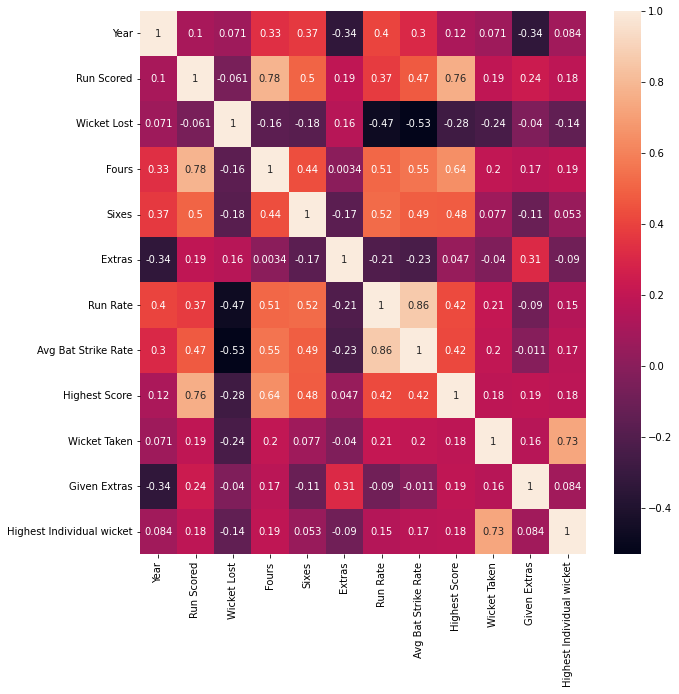

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

sns.heatmap(data.corr(), annot=True)